## Задания:
1.	Произвести дискретизацию произвольного одномерного действительного сигнала длительности T. Сравнить спектры (ПФ) исходного сигнала со спектром (ДВПФ) дискретизированного. Дискретизацию произвести с различной частотой.
2.	С помощью sinc функций восстановить дискретизированный с разной частотой сигнал. Сравнить исходный и восстановленный сигнал,а также их спектры. Объяснить полученные различия в сигнале и спектре.
3.	Объяснить понятие алиасинга на примерах из п.2


## Импорт библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import fft, fftfreq


## Функции


In [ ]:
def generate_signal(T, num_points=1000, harmonics=[(0.3, 1),
    (0.5, 1)], noise_level=0.5):
    """
    Генерирует одномерный необычный сигнал.

    Параметры:
    T (float): Длительность сигнала.
    num_points (int): Количество точек дискретизации.
    harmonics (list of tuples): Список гармоник в формате (частота, амплитуда).
    noise_level (float): Уровень шума, добавляемого к сигналу.

    Возвращает:
    t (numpy.ndarray): Массив времени.
    y (numpy.ndarray): Сгенерированный сигнал.
    """
    # Создание массива времени длиной T и пустого массива для сигнала
    t = np.linspace(0, T, num_points)
    y = np.zeros_like(t)

    # Добавлние в сигнал частотной и амплитудной составляющей
    # для каждой переданной гармоники
    for freq, amp in harmonics:
        y += amp * np.sin(2 * np.pi * freq * t)

    # Добавление случайного шума
    y += noise_level * np.random.normal(size=num_points)

    return t, y


def discretize_signal(t, y, dt):
    """
    Производит дискретизацию сигнала с заданной частотой дискретизации.

    Параметры:
    t (numpy.ndarray): Массив времени.
    y (numpy.ndarray): Исходный сигнал.
    dt (float): Частота дискретизации.

    Возвращает:
    t_d (numpy.ndarray): Дискретизированный массив времени.
    y_d (numpy.ndarray): Дискретизированный сигнал.
    """
    # Вычисление дискретизированных моментов времени
    t_d = np.arange(t[0], t[-1] + dt, dt)

    # Интерполяция сигнала в дискретизированных точках времени
    y_d = np.interp(t_d, t, y)

    return t_d, y_d


from scipy.fftpack import fft, fftfreq
def compute_spectra(t, y):
    """
    Вычисляет спектры сигнала с помощью преобразования Фурье.

    Параметры:
    t (numpy.ndarray): Массив времени.
    y (numpy.ndarray): Исходный сигнал.

    Возвращает:
    freq (numpy.ndarray): Частоты спектра.
    Y_f (numpy.ndarray): Спектр сигнала.
    """
    # Вычисление шага времени
    dt = t[1] - t[0]

    # Преобразование Фурье
    Y_f = fft(y)

    # Частоты для спектра
    freq = fftfreq(len(t), dt)

    return freq, Y_f


def sinc_interp(t_d, y_d, t):
    """
    Восстанавливает дискретизированный сигнал с помощью sinc-функций.

    Параметры:
    t_d (numpy.ndarray): Массив дискретизированного времени.
    y_d (numpy.ndarray): Дискретизированный сигнал.
    t (numpy.ndarray): Массив времени для восстановления сигнала.

    Возвращает:
    y_interp (numpy.ndarray): Восстановленный сигнал.
    """
    # Определяем разность во времени между дискретизированными точками
    T = t_d[1] - t_d[0]

    # Восстановленный сигнал
    y_interp = np.zeros_like(t)

    # Использование sinc-функции для интерполяции
    for i in range(len(t_d)):
        y_interp += y_d[i] * np.sinc((t - t_d[i]) / T)

    return y_interp


## Config

In [ ]:
# Временной интервал в секундах
T = 40
# Количество точек для создания исходного сигнала
num_points = 1000
# Список гармоник в формате (частота, амплитуда)
harmonics = [(0.1, 1), (0.5, 1.75), (3.5, 0.2)]
# Уровень шума добавляемый к исходному сигнала
noise_level = 0.8
# Частоты дискретизации
dts = (0.05, 0.15, 0.75, 1.5, 3)


## №1

Произвести дискретизацию произвольного одномерного действительного сигнала длительности T. Сравнить спектры (ПФ) исходного сигнала со спектром (ДВПФ) дискретизированного. Дискретизацию произвести с различной частотой.

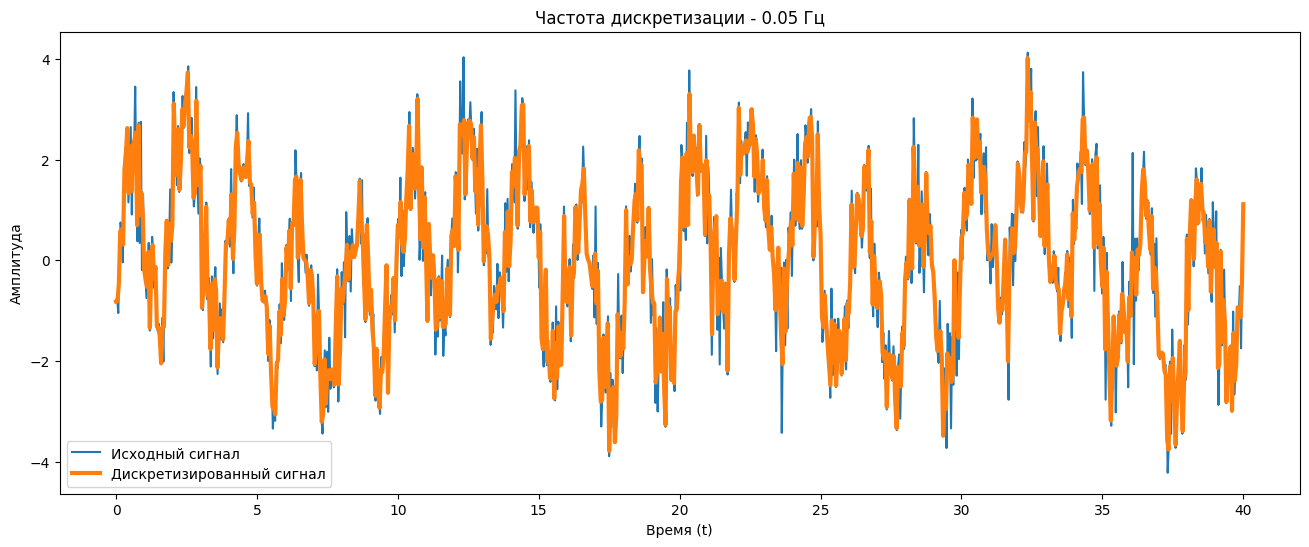

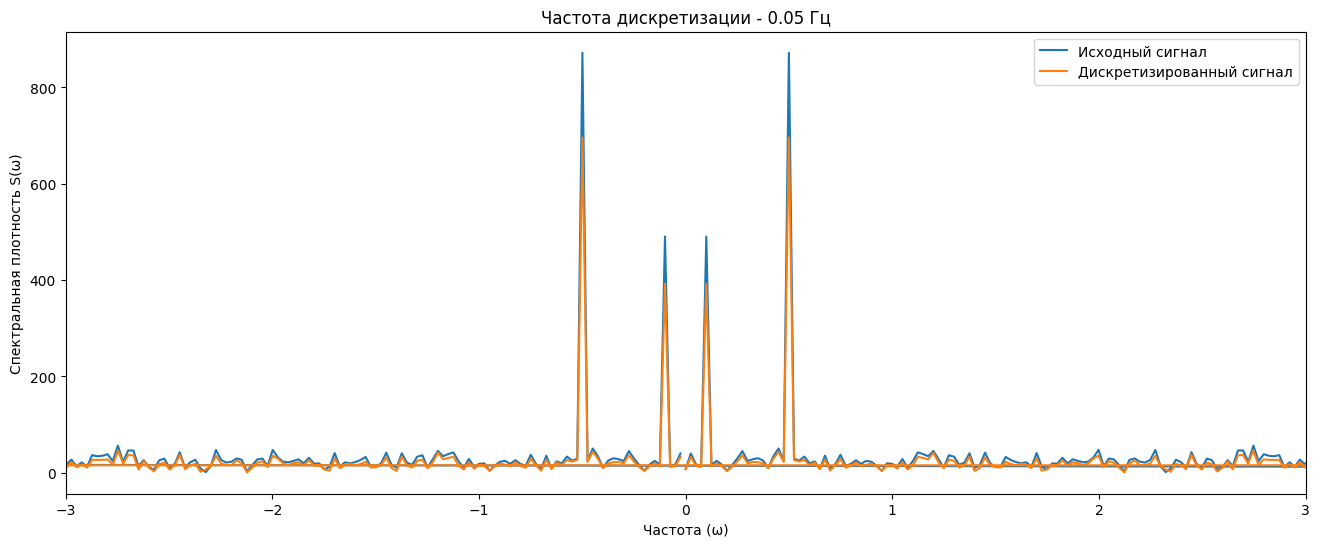

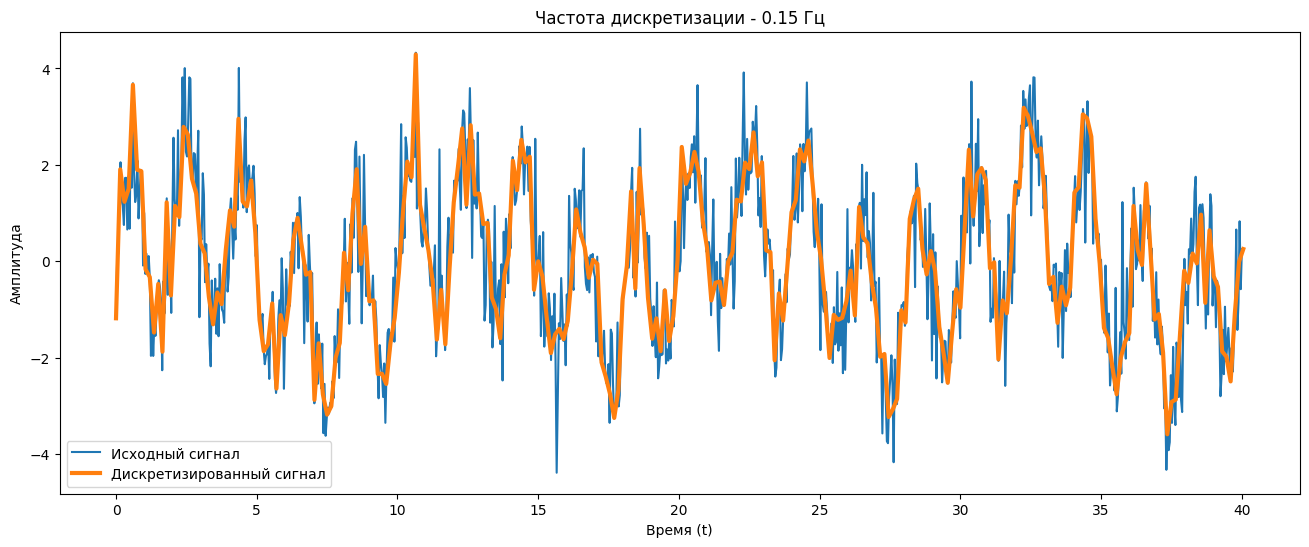

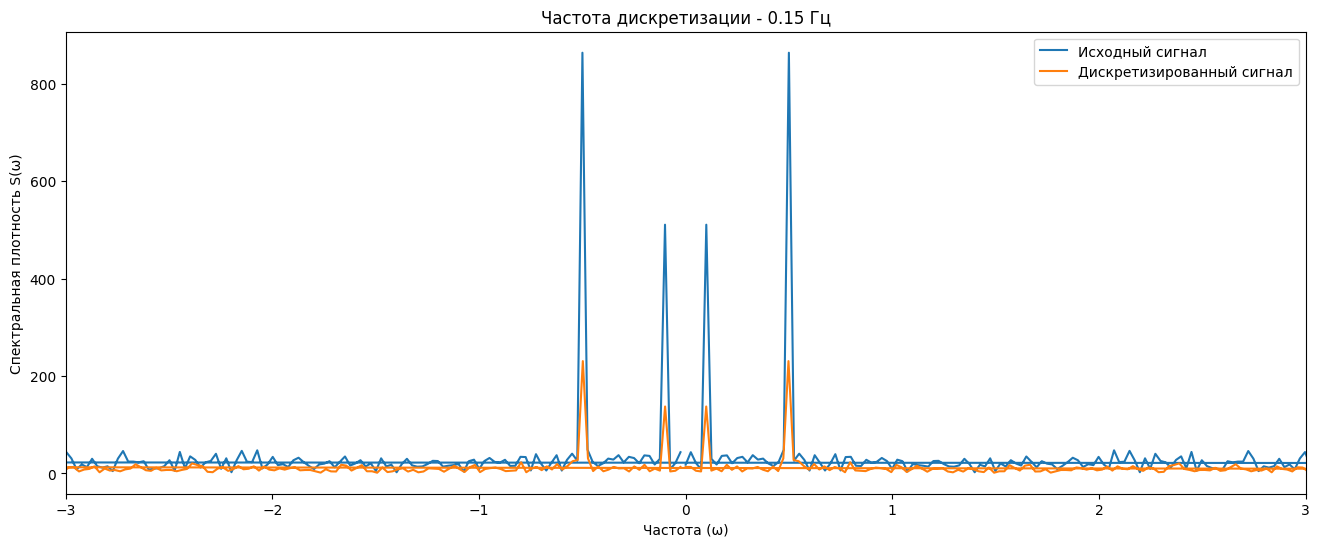

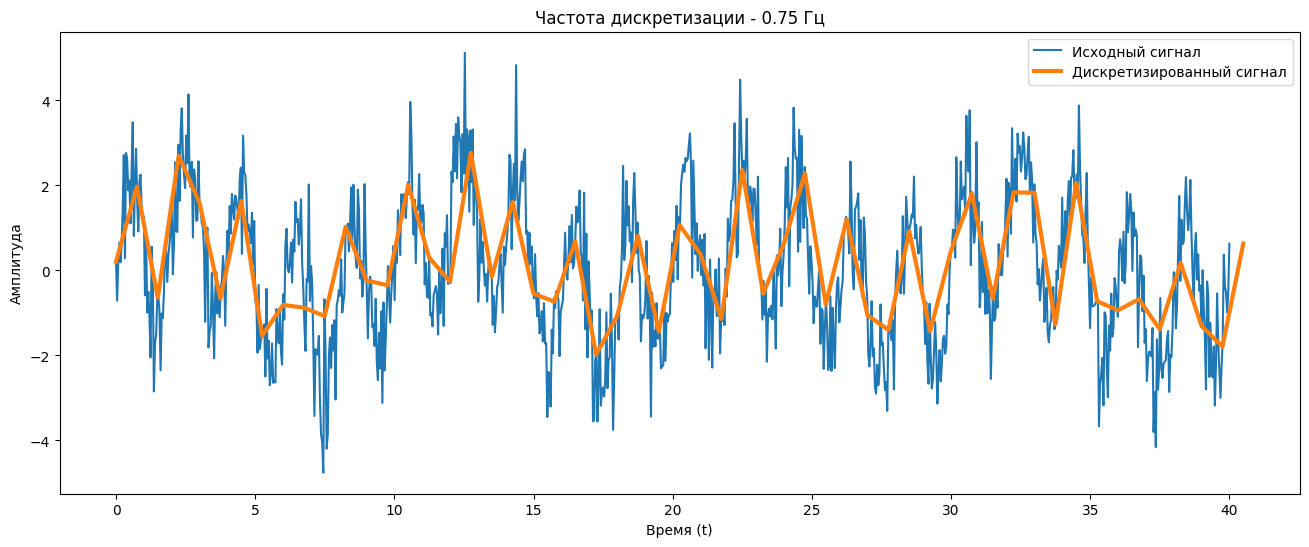

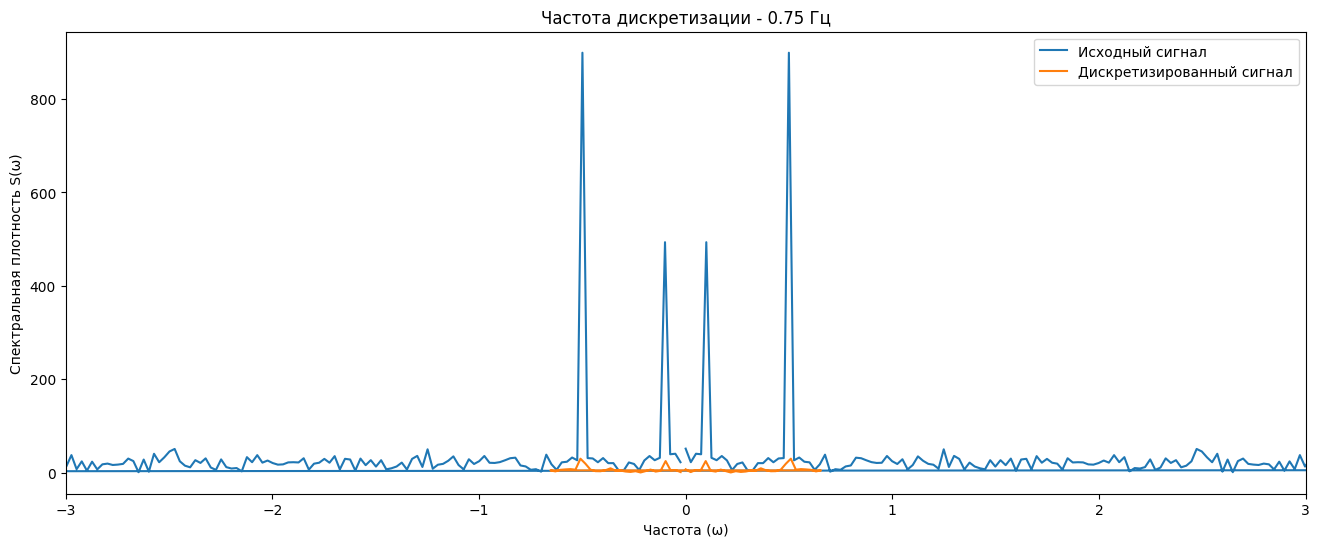

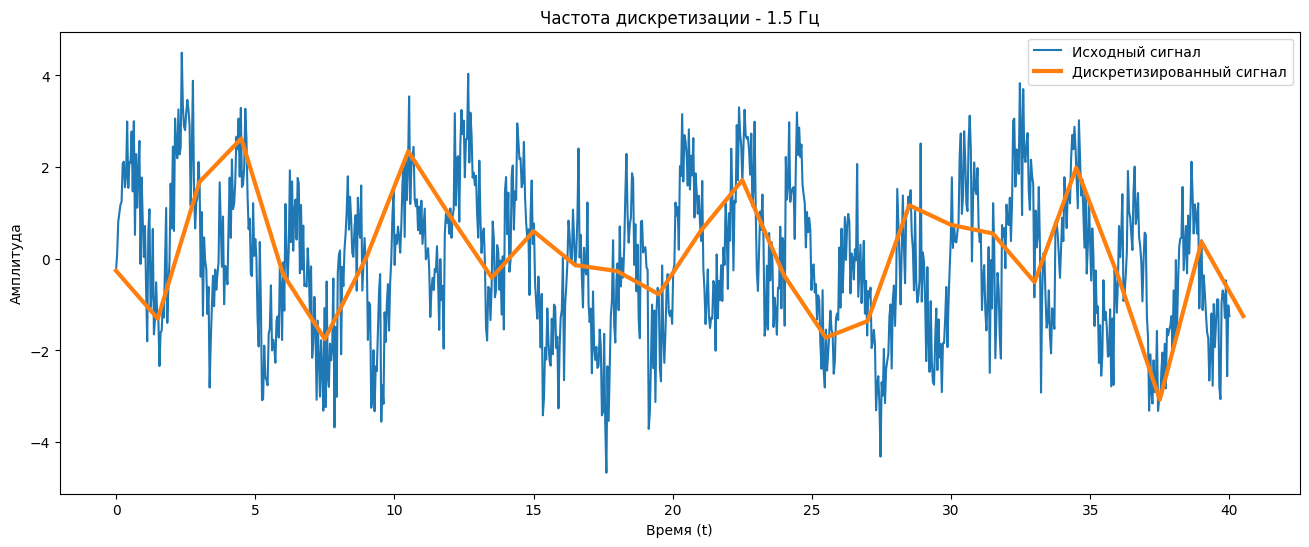

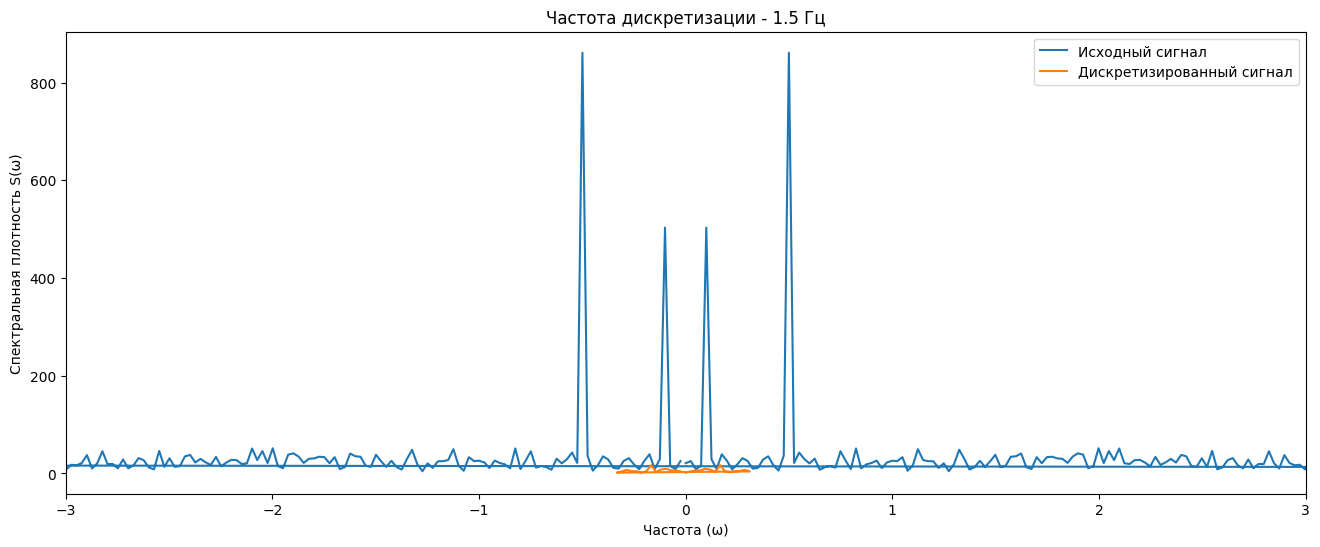

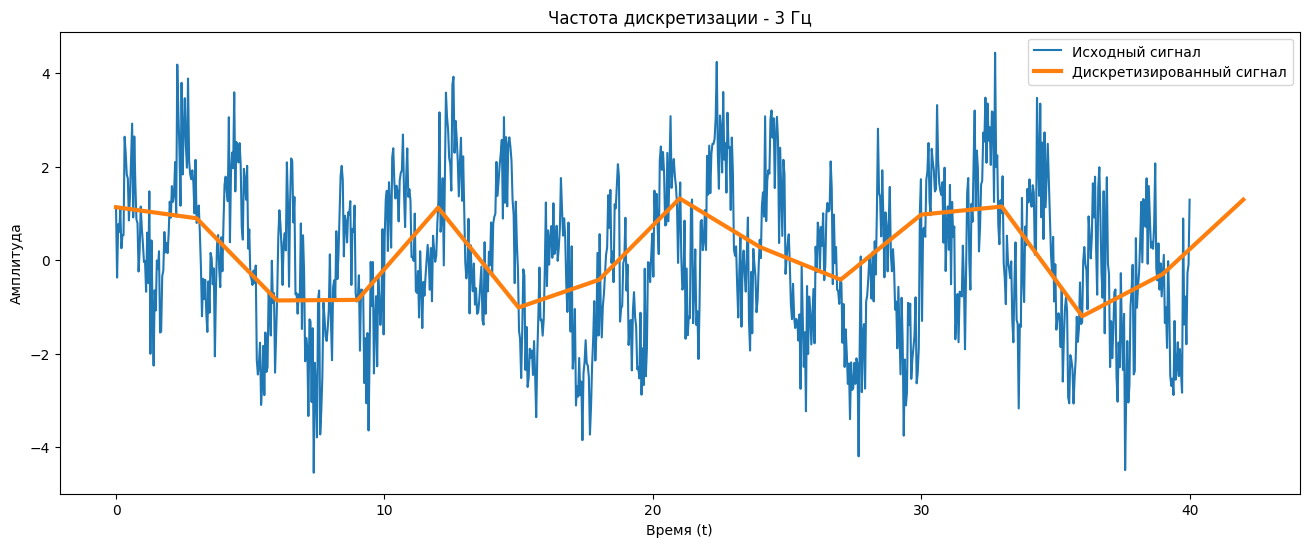

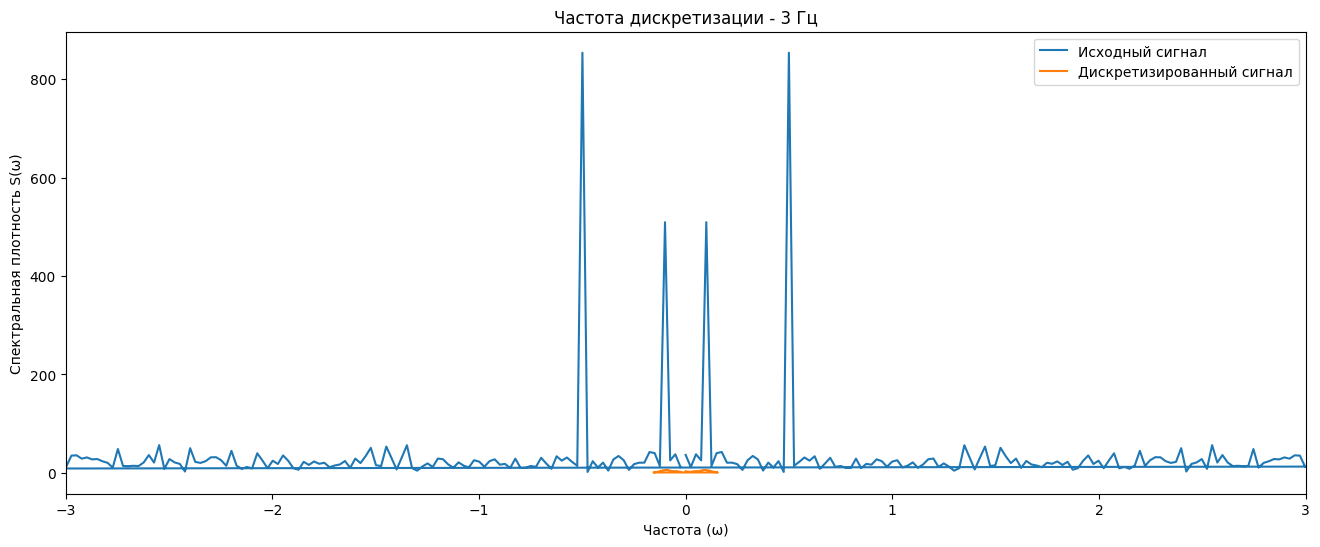

In [ ]:
for dt in dts:

    # Генерация исходного сигнала
    t, y = generate_signal(T, num_points, harmonics, noise_level)
    # Дискретизация исходного сигнала
    t_d, y_d = discretize_signal(t, y, dt)
    # Вычисление спектров исходного сигнала
    freq, Y_f = compute_spectra(t, y)
    # Вычисление спектров дискретизированного сигнала
    freq_d, Y_f_d = compute_spectra(t_d, y_d)

    # График сигналов
    plt.figure(figsize=(16, 6))
    plt.plot(t, y, label='Исходный сигнал')
    plt.plot(t_d, y_d, label='Дискретизированный сигнал', linewidth=3)
    heading = 'Частота дискретизации - ' + str(dt) + ' Гц'
    plt.title(heading)
    plt.xlabel('Время (t)')
    plt.ylabel('Амплитуда')
    plt.legend()
    plt.show()

    # График спектров
    plt.figure(figsize=(16, 6))
    plt.plot(freq, np.abs(Y_f), label='Исходный сигнал')
    plt.plot(freq_d, np.abs(Y_f_d), label='Дискретизированный сигнал')
    heading = 'Частота дискретизации - ' + str(dt) + ' Гц'
    plt.title(heading)
    plt.xlabel('Частота (ω)')
    plt.ylabel('Спектральная плотность S(ω)')
    plt.xlim(-3, 3)
    plt.legend()
    plt.show()



## №2


С помощью sinc функций восстановить дискретизированный с разной частотой сигнал. Сравнить исходный и восстановленный сигнал,а также их спектры. Объяснить полученные различия в сигнале и спектре.

<ipython-input-76-a955a621a737>:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_d, y_d, linefmt='r-', markerfmt='ro', basefmt='r-', label='Дискретизированный сигнал', use_line_collection=True)


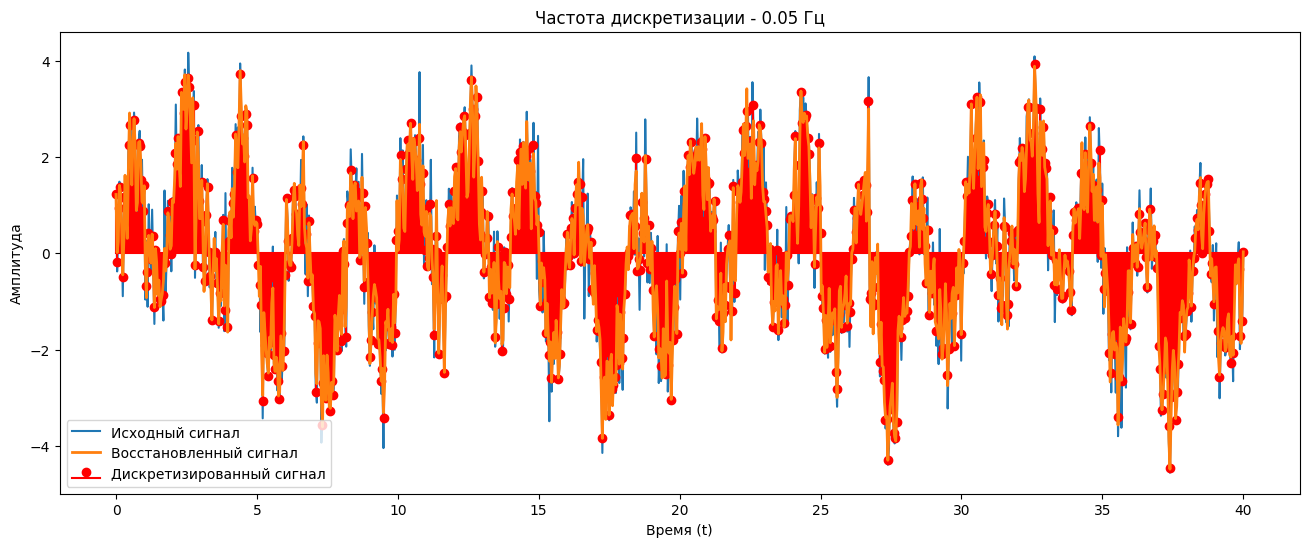

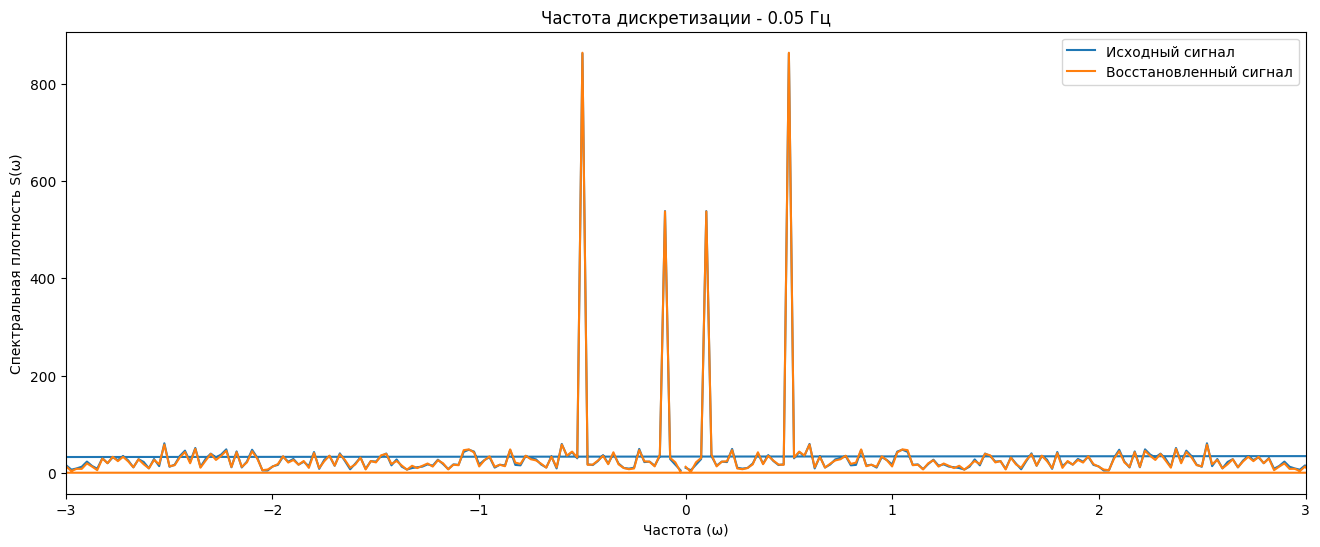

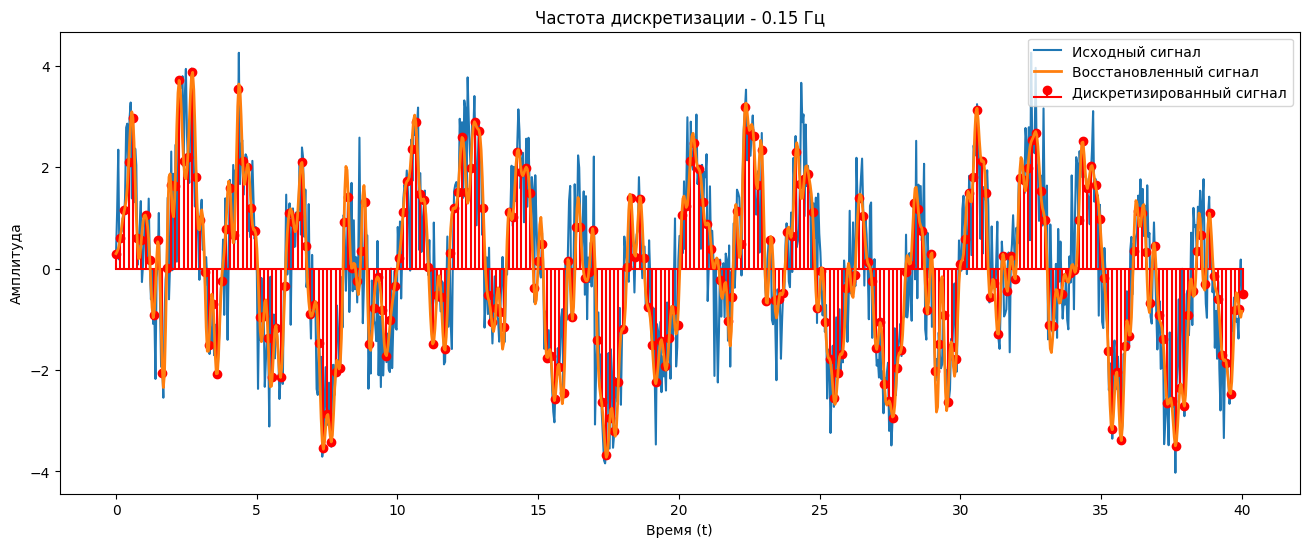

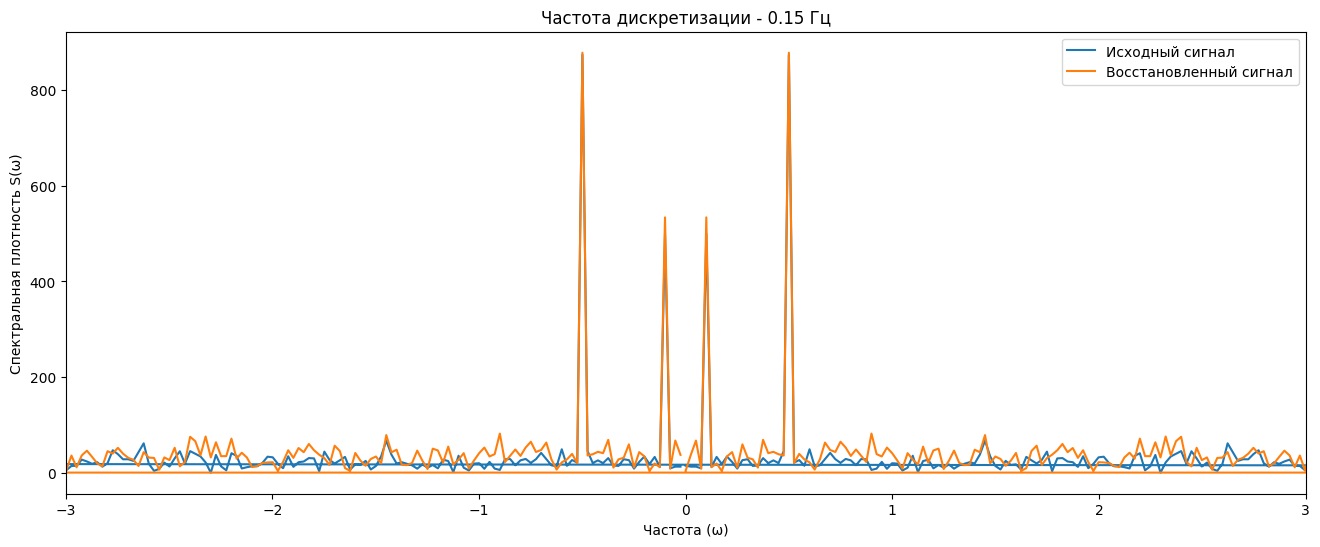

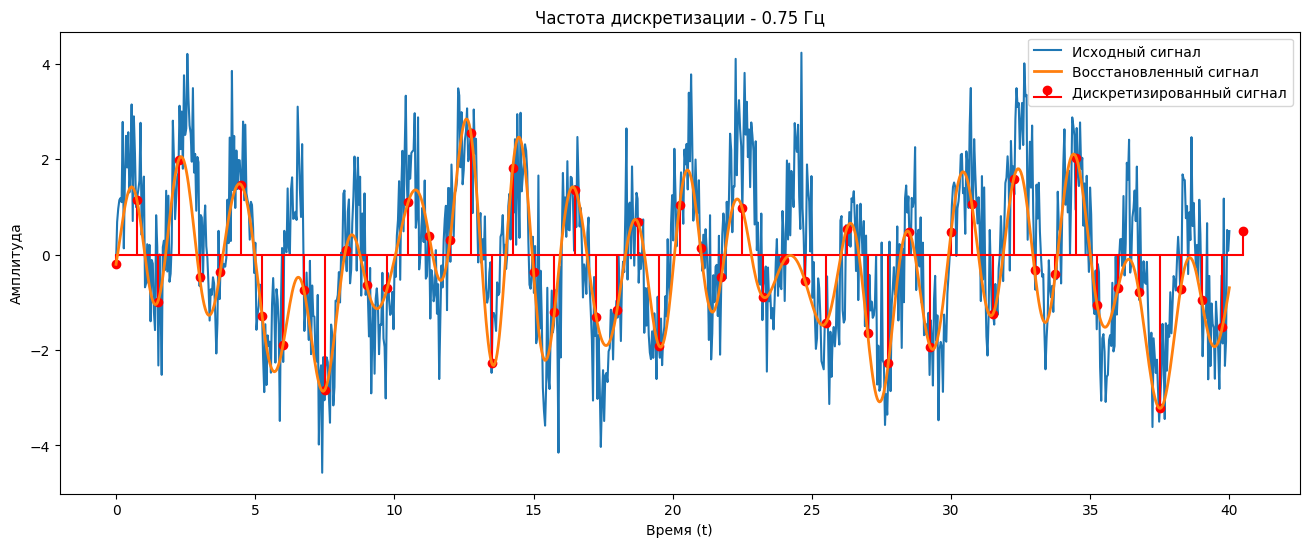

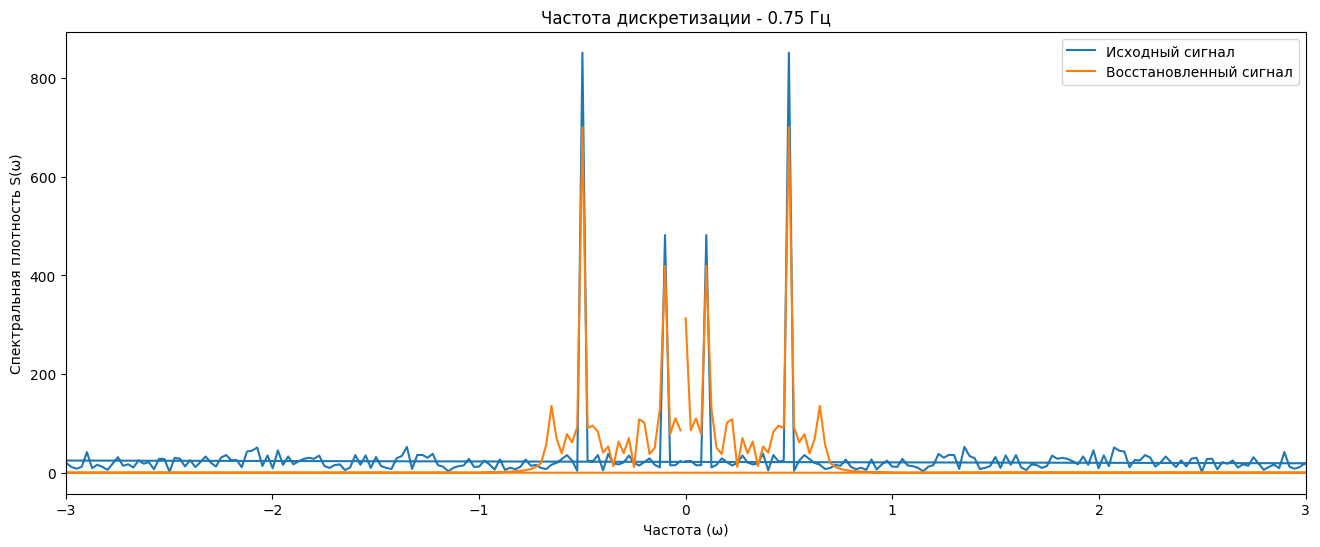

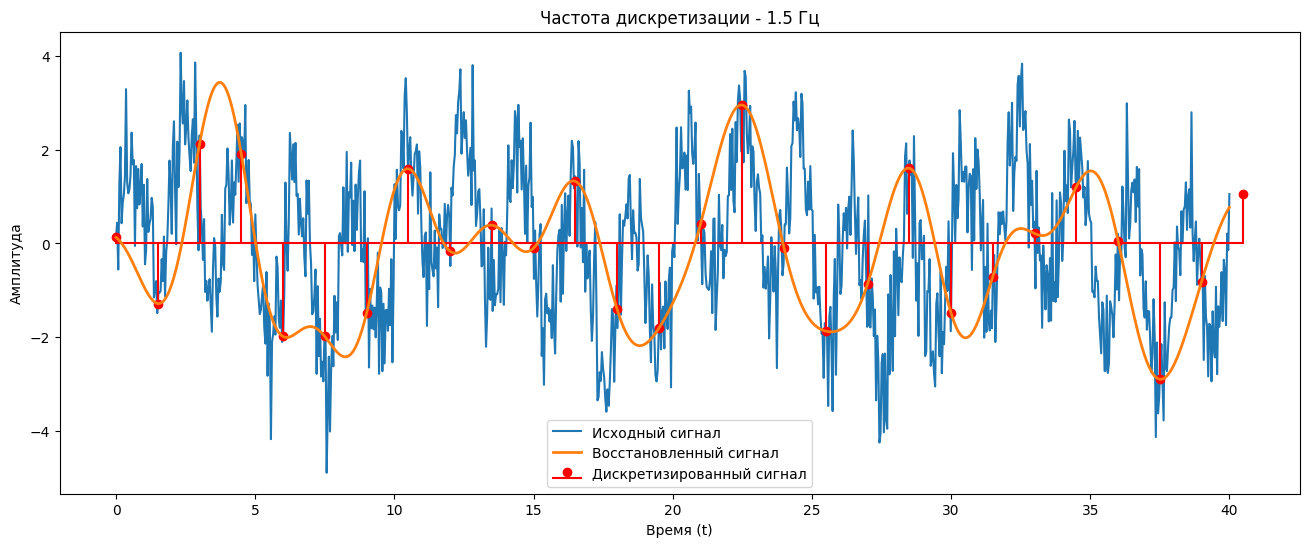

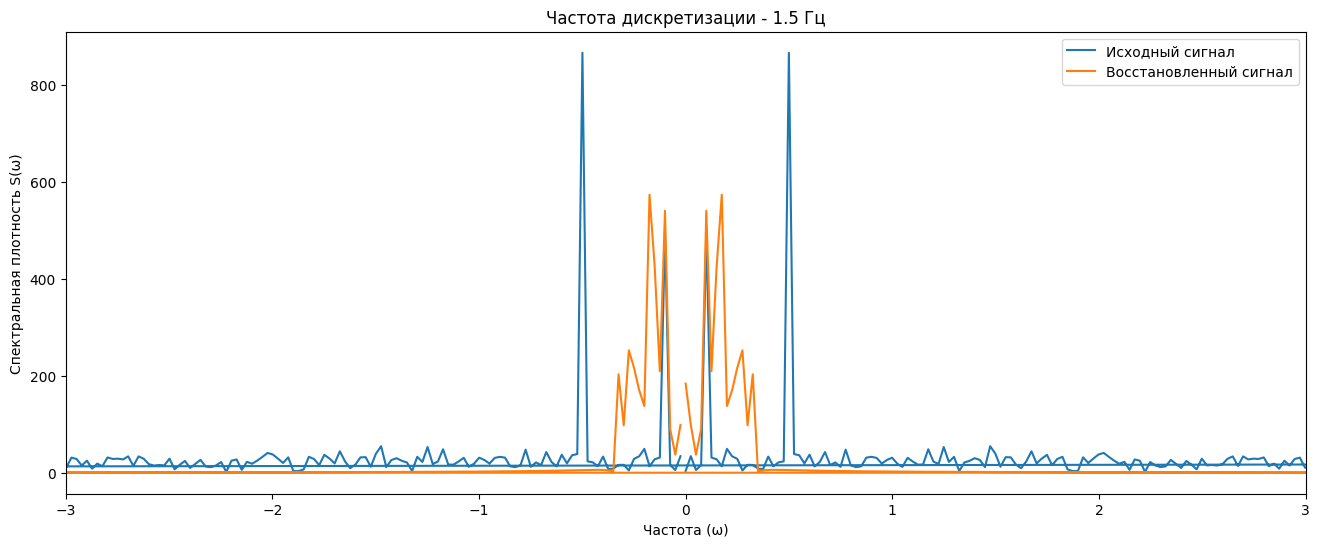

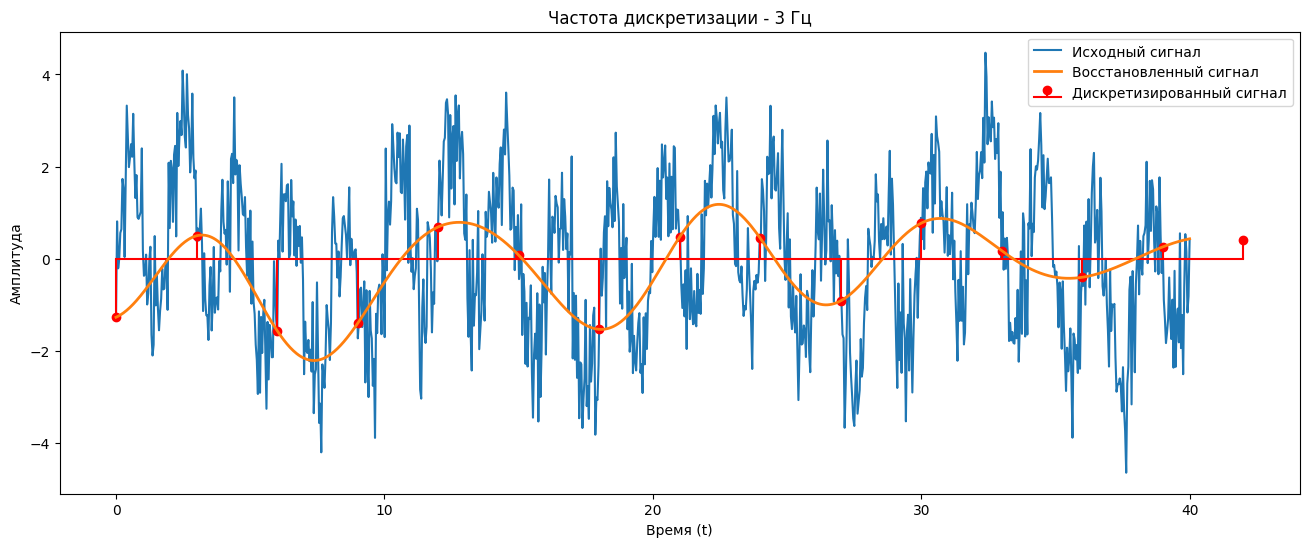

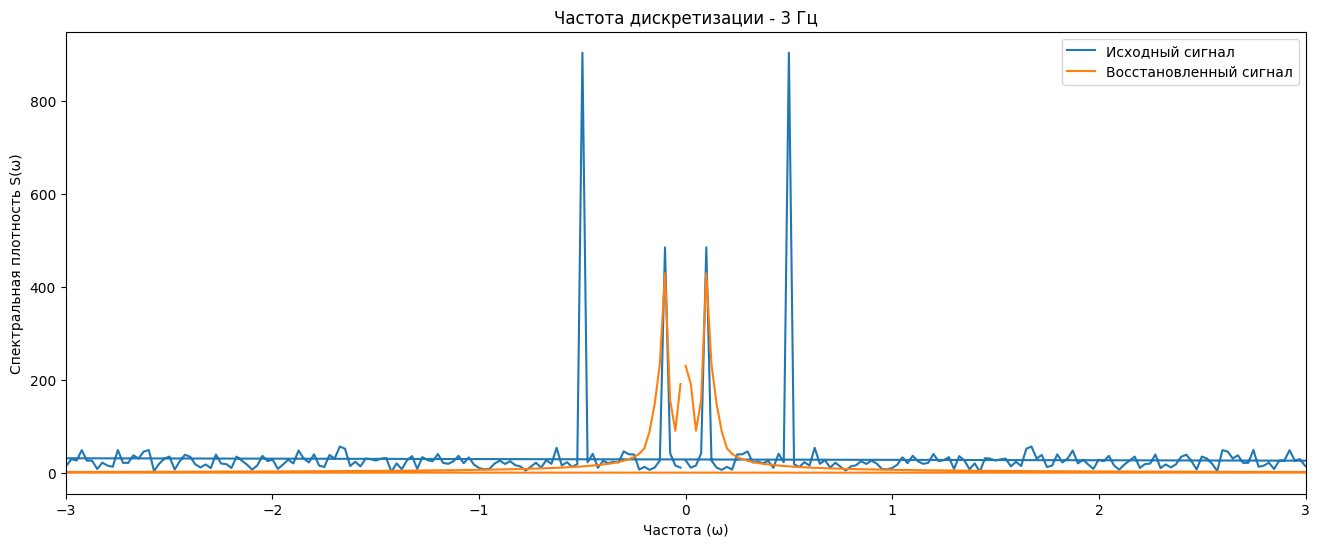

In [ ]:
for dt in dts:

    # Генерация исходного сигнала
    t, y = generate_signal(T, num_points, harmonics, noise_level)
    # Дискретизация исходного сигнала
    t_d, y_d = discretize_signal(t, y, dt)
    # Восстановление сигнала
    y_interp = sinc_interp(t_d, y_d, t)\
    # Вычисление спектров исходного сигнала
    freq, Y_f = compute_spectra(t, y)
    # Вычисление спектров восстановленного сигнала
    freq_v, Y_f_v = compute_spectra(t, y_interp)

    # График сигналов
    plt.figure(figsize=(16, 6))
    plt.plot(t, y, label='Исходный сигнал')
    plt.stem(t_d, y_d, linefmt='r-', markerfmt='ro', basefmt='r-', label='Дискретизированный сигнал', use_line_collection=True)
    plt.plot(t, y_interp, label='Восстановленный сигнал', linewidth=2)
    heading = 'Частота дискретизации - ' + str(dt) + ' Гц'
    plt.title(heading)
    plt.xlabel('Время (t)')
    plt.ylabel('Амплитуда')
    plt.legend()
    plt.show()

    # График спектров
    plt.figure(figsize=(16, 6))
    plt.plot(freq, np.abs(Y_f), label='Исходный сигнал')
    plt.plot(freq_v, np.abs(Y_f_v), label='Восстановленный сигнал')
    heading = 'Частота дискретизации - ' + str(dt) + ' Гц'
    plt.title(heading)
    plt.xlabel('Частота (ω)')
    plt.ylabel('Спектральная плотность S(ω)')
    plt.xlim(-3, 3)
    plt.legend()
    plt.show()


## №3


Объяснить понятие алиасинга на примерах из п.2


В данной лабораторной работе было произведено дискретизация одномерного действительного сигнала и восстановление его в исходный вид с использованием sinc-функций. В процессе выполнения работы были построены и проанализированы спектры исходного и восстановленного сигналов, что позволило наглядно продемонстрировать явление алиасинга.

Алиасинг (aliasing) — это явление, которое возникает при дискретизации сигнала, когда частота дискретизации недостаточна для точного представления сигнала. Это приводит к наложению спектральных компонент сигнала и появлению искажений.

Основной причиной алиасинга является несоблюдение теоремы Котельникова (теоремы Найквиста). Согласно этой теореме, для корректного представления и восстановления сигнала после дискретизации частота дискретизации должна быть как минимум в два раза больше максимальной частоты исходного сигнала. Если эта условие не выполняется, высокочастотные компоненты сигнала "накладываются" на низкочастотные компоненты, создавая ложные частоты, которые и являются причиной искажений.

1. Исходный сигнал и его спектр:
Исходный сигнал состоял из двух синусоидальных компонент с разными частотами. При построении его спектра (с использованием преобразования Фурье) были видны два четких пика, соответствующих этим частотам.
2. Дискретизированный сигнал и его спектр: При дискретизации сигнала с различными частотами (выше и ниже частоты Найквиста) наблюдались следующие эффекты:
 * При дискретизации с частотой, превышающей частоту Найквиста, спектр дискретизированного сигнала близко соответствовал спектру исходного сигнала.
  * При дискретизации с частотой ниже частоты Найквиста в спектре дискретизированного сигнала появились дополнительные компоненты, которых не было в исходном сигнале. Эти компоненты являются результатом алиасинга.
3. Восстановленный сигнал и его спектр: Восстановленный сигнал был получен с использованием sinc-интерполяции. Спектр восстановленного сигнала также был проанализирован:
 * При правильной частоте дискретизации спектр восстановленного сигнала хорошо совпадал со спектром исходного сигнала.
 * При низкой частоте дискретизации в спектре восстановленного сигнала наблюдались артефакты, аналогичные тем, что возникли в спектре дискретизированного сигнала, указывая на присутствие алиасинга.

 __Заключение:__

 Алиасинг возникает из-за недостаточной частоты дискретизации, что приводит к наложению спектральных компонент и искажению восстановленного сигнала. Для предотвращения алиасинга необходимо соблюдать теорему Найквиста, выбирая частоту дискретизации как минимум в два раза выше максимальной частоты исходного сигнала. Это позволяет точно представлять и восстанавливать сигнал без искажений. В ходе лабораторной работы были наглядно продемонстрированы эффекты алиасинга и важность выбора правильной частоты дискретизации для точного восстановления исходного сигнала.